Data Cleaning and Preprocessing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
# Read csv file
df = pd.read_csv('commits.csv')
df['Commited Date'] = pd.to_datetime(df['Commited Date'])
df = df.sort_values(by='Commited Date')
df.index = [i for i in range(1,df.shape[0]+1)]

# Correcting the Contributor column
for i in range(1,df.shape[0]+1):
    if df.loc[i,'Author'] == df.loc[i,'Contributor']:
        df.loc[i,'Contributor'] = df.loc[i,'Author'].replace(' ','')
# Detect which Authors changed their Github name and change their Contributor id to the latest time
dict = {df.loc[i,'Author'] : df.loc[i,'Contributor'] for i in range(1,df.shape[0]+1)}
for i in range(1,df.shape[0]+1):
    df.loc[i,'Contributor'] = dict[df.loc[i,'Author']]
# Set commited date as index
df.set_index('Commited Date', inplace=True)
df['Month'] = df.index.to_period('M')
# Convert Files columns to Array
df['Files'] = df['Files'].apply(ast.literal_eval)
df.head(10)

,Author,Commit Message,Contributor,Files,Passed,Month
Commited Date,,,,,,
2023-01-02,Zeeshan Tamboli,[docs] Fix demo code selection through copy sh...,ZeeshanTamboli,[docs/src/modules/utils/CodeCopy.tsx],Success,2023-01
2023-01-02,Olivier Tassinari,[docs] Fix content wider than screen regressio...,oliviertassinari,[docs/src/modules/components/AppLayoutDocs.js],Success,2023-01
2023-01-02,Olivier Tassinari,[website] Improve Lead Designer role descripti...,oliviertassinari,"[docs/pages/careers.tsx, docs/src/pages/career...",Success,2023-01
2023-01-02,Olivier Tassinari,[test] Always use & for nesting styles (#35702),oliviertassinari,"[packages/mui-system/src/Box/Box.spec.tsx, pac...",Success,2023-01
2023-01-02,Benny Joo,v5.11.3 (#35708),hbjORbj,"[CHANGELOG.md, benchmark/package.json, docs/pa...",Success,2023-01
2023-01-02,renovate[bot],Bump @definitelytyped/typescript-versions to ^...,renovate[bot],"[package.json, renovate.json, yarn.lock]",Success,2023-01
2023-01-02,renovate[bot],Bump @types/yargs to ^17.0.18 (#35692)\n\nCo-a...,renovate[bot],"[package.json, yarn.lock]",Success,2023-01
2023-01-02,renovate[bot],Bump markdownlint-cli2 to ^0.6.0 (#35697)\n\nC...,renovate[bot],"[package.json, yarn.lock]",Success,2023-01
2023-01-02,renovate[bot],Bump @chakra-ui/system to ^2.3.7 (#35688)\n\nC...,renovate[bot],"[benchmark/package.json, yarn.lock]",Success,2023-01


In [15]:
date_df = pd.DataFrame(index=np.unique(df.index.values))
date_df.index.name = 'Months'
date_df['Commits'] = df.index.value_counts()
date_df['Month'] = date_df.index.to_period('M')
date_df.head()

,Commits,Month
Months,,
2023-01-02,15,2023-01
2023-01-03,5,2023-01
2023-01-04,4,2023-01
2023-01-05,3,2023-01
2023-01-06,1,2023-01


Top 5 Months with the most Commits

In [16]:
monthly_counts = date_df.groupby('Month')['Commits'].sum().to_frame()
monthly_counts.sort_values(by = 'Commits',ascending=False).head()

,Commits
Month,
2023-08,280
2023-07,273
2023-09,266
2023-10,255
2023-11,207


Total Commits in 2023

In [17]:
monthly_counts.sum()

Commits    2495
dtype: int64

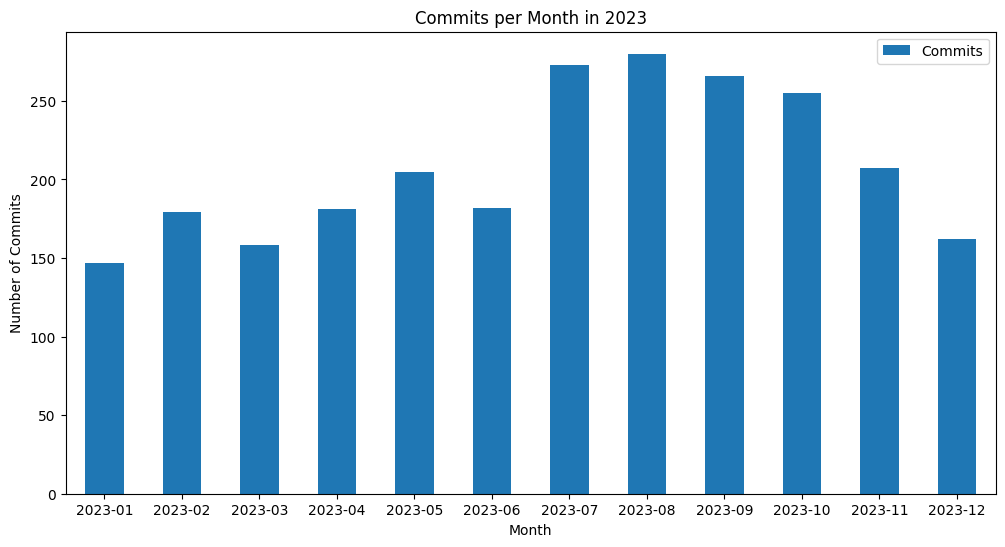

In [18]:
monthly_counts.plot(kind = 'bar',title = 'Commits per Month in 2023',ylabel="Number of Commits", figsize=(12, 6))
plt.xticks(rotation=0) 
plt.show()

Total Contributors in 2023

In [19]:
df['Author'].unique().size

256

Setting up a dataframe for Contributors

In [20]:
contributor_df = pd.DataFrame(index=df['Contributor'].unique())
contributor_df.index.name = 'Contributor'
contributor_df['Author'] = df['Author'].unique()
contributor_df['Total Commits'] = df['Contributor'].value_counts()
rates = {}
for i in df['Contributor'].unique():
    rate = df['Passed'][(df['Contributor'] == i) & (df['Passed'] == 'Success')].size
    rates[i] = str(rate/df['Passed'][df['Contributor'] == i].size*100) + '%'
contributor_df['Success Rate'] = rates
contributor_df

,Author,Total Commits,Success Rate
Contributor,,,
ZeeshanTamboli,Zeeshan Tamboli,71,69.01408450704226%
oliviertassinari,Olivier Tassinari,354,51.41242937853108%
hbjORbj,Benny Joo,71,84.50704225352112%
renovate[bot],renovate[bot],737,40.027137042062414%
mnajdova,Marija Najdova,83,71.08433734939759%
...,...,...,...
adamhylander,adamhylander,1,0.0%
muazaqdas,Muaz Aqdas,1,0.0%
Kamino0,Kamino0,1,100.0%


Top 5 Contributors in 2023

In [21]:
contributor_df.sort_values(by = 'Total Commits', ascending=False, inplace=True)
contributor_df.head()

,Author,Total Commits,Success Rate
Contributor,,,
renovate[bot],renovate[bot],737,40.027137042062414%
oliviertassinari,Olivier Tassinari,354,51.41242937853108%
danilo-leal,Danilo Leal,146,56.16438356164384%
sai6855,sai chand,106,62.264150943396224%
siriwatknp,Siriwat K,99,75.75757575757575%


renovate[bot] Contribution Percentage

In [22]:
bot_percentage = contributor_df['Total Commits'][contributor_df['Author'] == 'renovate[bot]'].values[0]
str(bot_percentage/2495 * 100) + '%'

'29.539078156312627%'

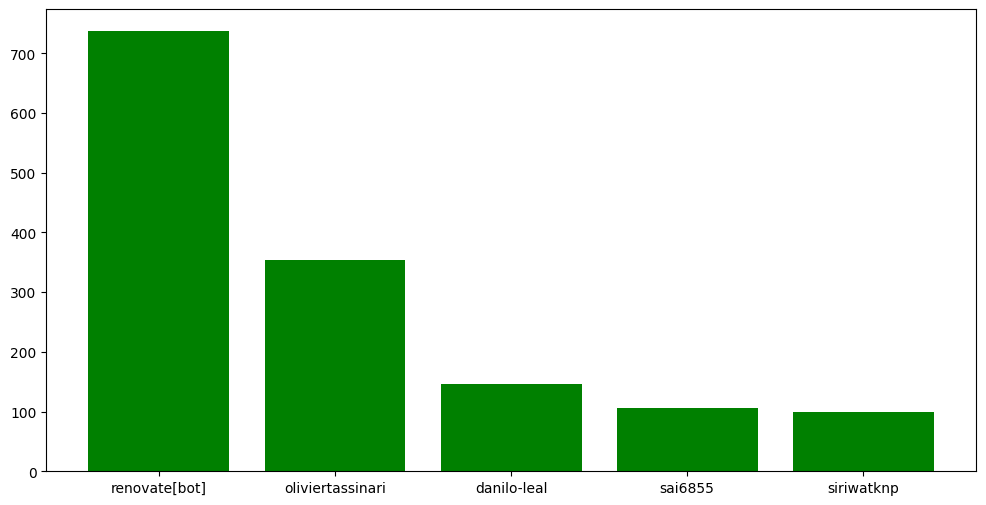

In [23]:
topfive_df = contributor_df.head(5)
plt.figure(figsize=(12, 6))
plt.bar(topfive_df.index,topfive_df['Total Commits'],color='green')
plt.show()

Annual activity frequency of the 5 most active contributors

In [24]:
contributor_commits = df.groupby('Month')['Contributor'].value_counts().unstack(fill_value=0)
for i in df['Contributor'].unique():
    contributor_commits.drop(i,axis=1,inplace=True) if i != 'renovate[bot]' and i != 'oliviertassinari' and i != 'danilo-leal' and i != 'sai6855' and i != 'siriwatknp' else i
contributor_commits.index.name = 'Months'
contributor_commits

Contributor,danilo-leal,oliviertassinari,renovate[bot],sai6855,siriwatknp
Months,,,,,
2023-01,0,21,41,9,10
2023-02,2,21,53,8,16
2023-03,2,20,35,11,12
2023-04,7,22,42,12,11
2023-05,6,8,73,9,8
2023-06,13,32,60,6,8
2023-07,11,48,83,8,9
2023-08,37,51,68,8,6
2023-09,23,54,65,14,5


<Axes: xlabel='Months', ylabel='Commits'>

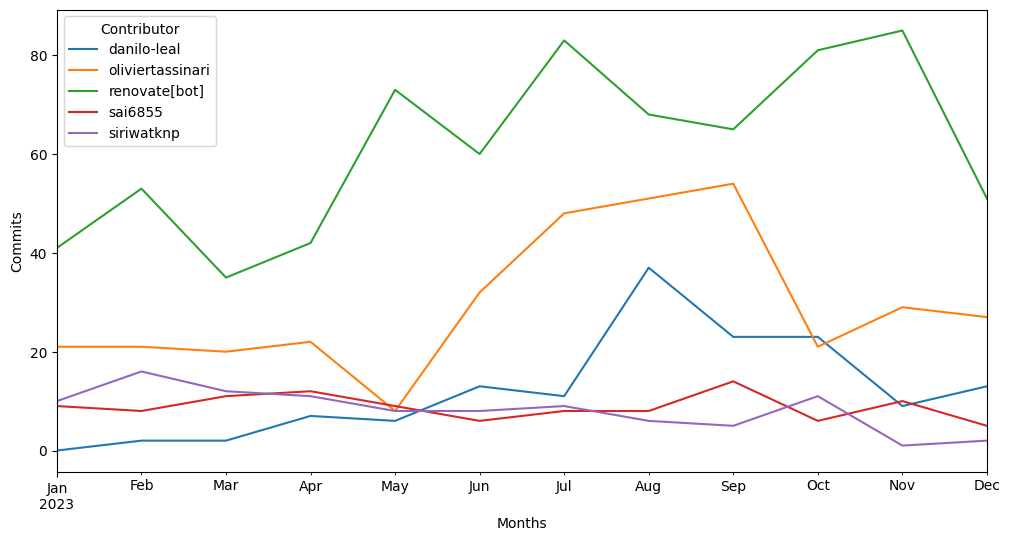

In [25]:
contributor_commits.plot(ylabel = 'Commits',kind = 'line', figsize = (12,6))

renovate[bot] Period

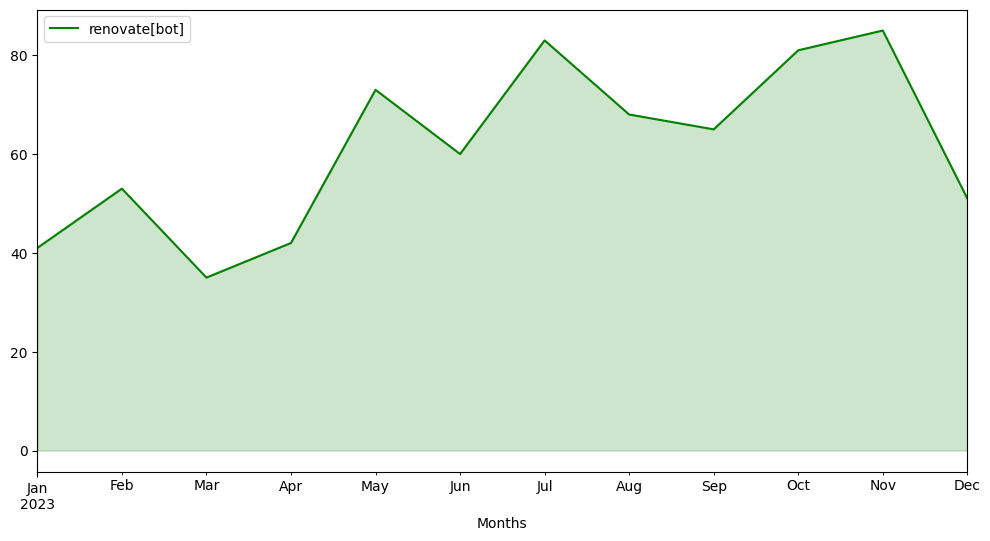

In [26]:
bot_df = contributor_commits['renovate[bot]'].to_frame()
bot_df.plot(kind = 'line', figsize = (12,6),color = 'green')
plt.fill_between(bot_df.index, bot_df['renovate[bot]'], color = 'green', alpha = 0.2)

oliviertassinari Period

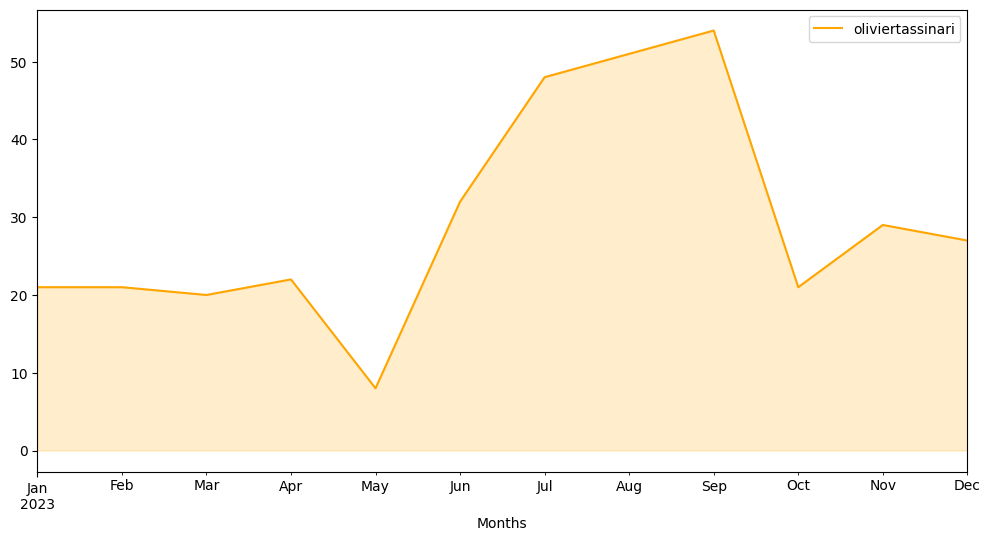

In [27]:
olivier_df = contributor_commits['oliviertassinari'].to_frame()
olivier_df.plot(kind = 'line', figsize = (12,6),color = 'orange')
plt.fill_between(olivier_df.index, olivier_df['oliviertassinari'], color = 'orange', alpha = 0.2)
plt.show()

Growth of Repository by Month

In [28]:
grow_df = monthly_counts.cumsum()
used = set()
contributor = []
for month in df['Month'].unique():
    contributors = df[df['Month'] == month]['Contributor']
    for contributorr in contributors:
        used.add(contributorr)
    contributor.append(len(used))
grow_df['Contributors'] = contributor 
grow_df

,Commits,Contributors
Month,,
2023-01,147,40
2023-02,326,58
2023-03,484,82
2023-04,665,97
2023-05,870,125
2023-06,1052,142
2023-07,1325,165
2023-08,1605,186
2023-09,1871,206


<Axes: xlabel='Month'>

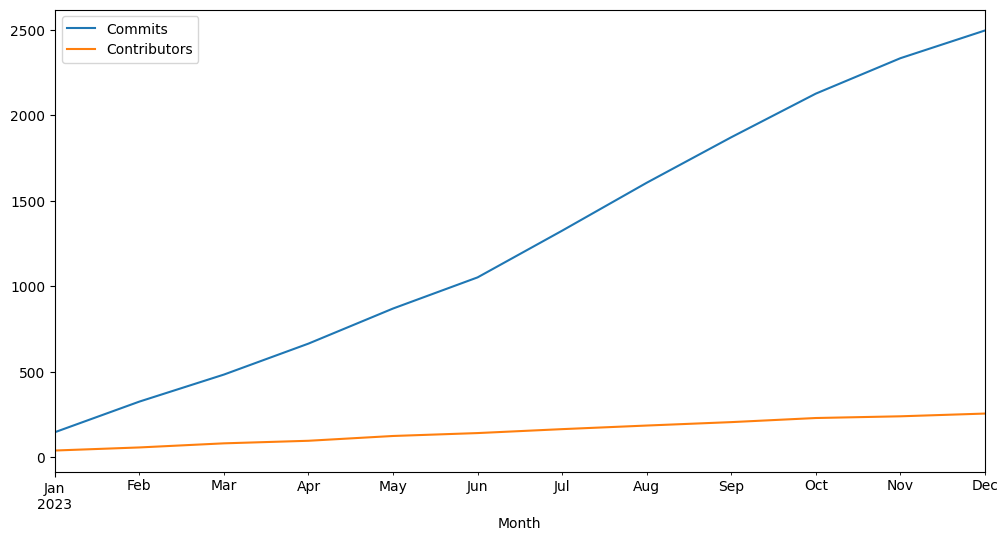

In [29]:
grow_df.plot(figsize = (12,6))

Purpose in Commit Message

In [30]:
adds = 0
updates = 0
fixs = 0
removes = 0
bumps = 0
renames = 0
revises = 0
replaces = 0
for i in df['Commit Message']:
    if 'add' in i.lower(): 
        adds+=1
    if 'update' in i.lower():
        updates+=1
    if 'fix' in i.lower():
        fixs+=1
    if 'remove' in i.lower():
        removes+=1
    if 'bump' in i.lower():
        bumps+=1
    if 'rename' in i.lower():
        renames+=1
    if 'revise' in i.lower():
        revises+=1
    if 'replace' in i.lower():
        replaces+=1
word_df = pd.DataFrame(index=['Add','Update','Fix','Remove','Bump','Rename','Revise','Replace'])
word_df['Total Counts'] = [adds,updates,fixs,removes,bumps,renames,revises,replaces]
word_df

,Total Counts
Add,333
Update,94
Fix,472
Remove,98
Bump,756
Rename,13
Revise,29
Replace,25


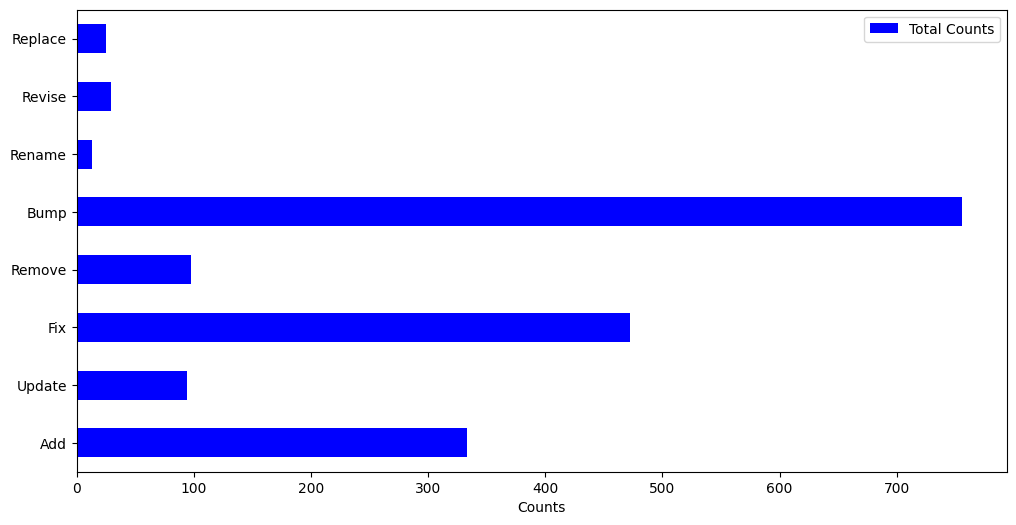

In [31]:
word_df.plot(xlabel = 'Counts',kind = 'barh', figsize = (12,6), color = 'blue')
plt.xticks(rotation=0) 
plt.show()

Files Changed Per Month ( not unique )

In [32]:
files_df = pd.DataFrame(index=df['Month'])
files_df.index.name = 'Months'
files_df['Number of Files Changed'] = [len(i) for i in df['Files'].values]
files_df = files_df.groupby('Months')['Number of Files Changed'].sum().to_frame()
files_df

,Number of Files Changed
Months,
2023-01,987
2023-02,2181
2023-03,2061
2023-04,2413
2023-05,864
2023-06,2293
2023-07,3441
2023-08,3163
2023-09,2472


In [33]:
files_df.sort_values(by = 'Number of Files Changed', ascending=False).head()

,Number of Files Changed
Months,
2023-07,3441
2023-08,3163
2023-10,2695
2023-09,2472
2023-04,2413


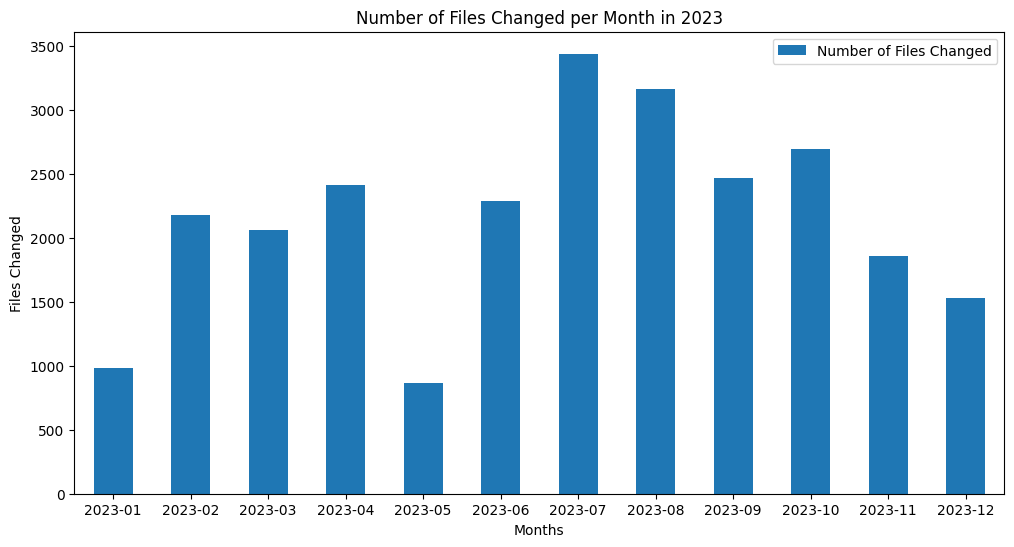

In [34]:
files_df.plot(title = 'Number of Files Changed per Month in 2023',ylabel = 'Files Changed',kind = 'bar', figsize = (12,6))
plt.xticks(rotation=0)
plt.show()

Compare Files Changed and Commits per Month

<Axes: xlabel='Months'>

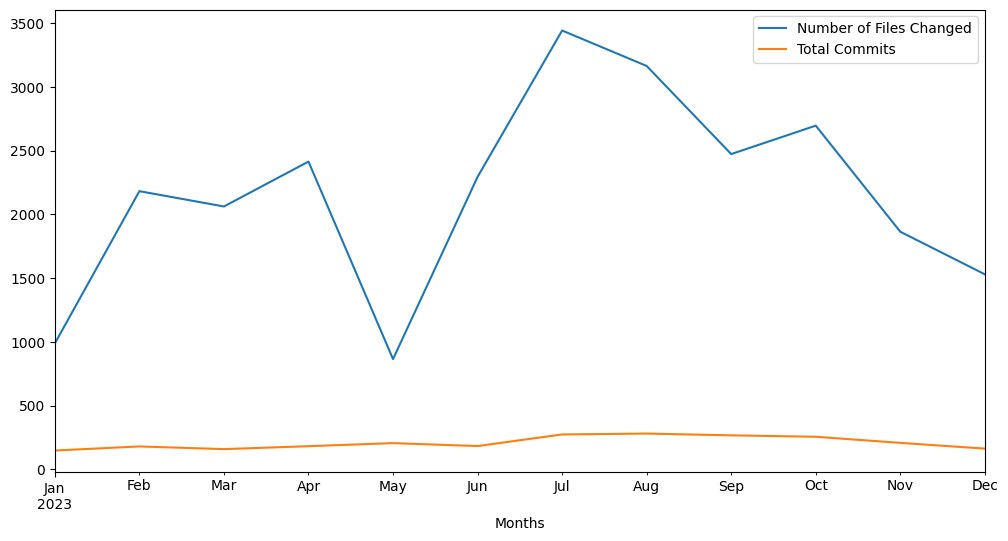

In [35]:
files_df['Total Commits'] = monthly_counts['Commits']
files_df.plot(kind = 'line', figsize = (12,6))

Top 5 Files in Repo with the Most Commits

In [36]:
file_df = df.explode('Files')['Files'].value_counts()
file_df.head()

Files
yarn.lock                                        750
package.json                                     441
docs/package.json                                321
packages/mui-material/package.json               126
packages/typescript-to-proptypes/package.json    113
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 files with most commits'}, xlabel='Files'>

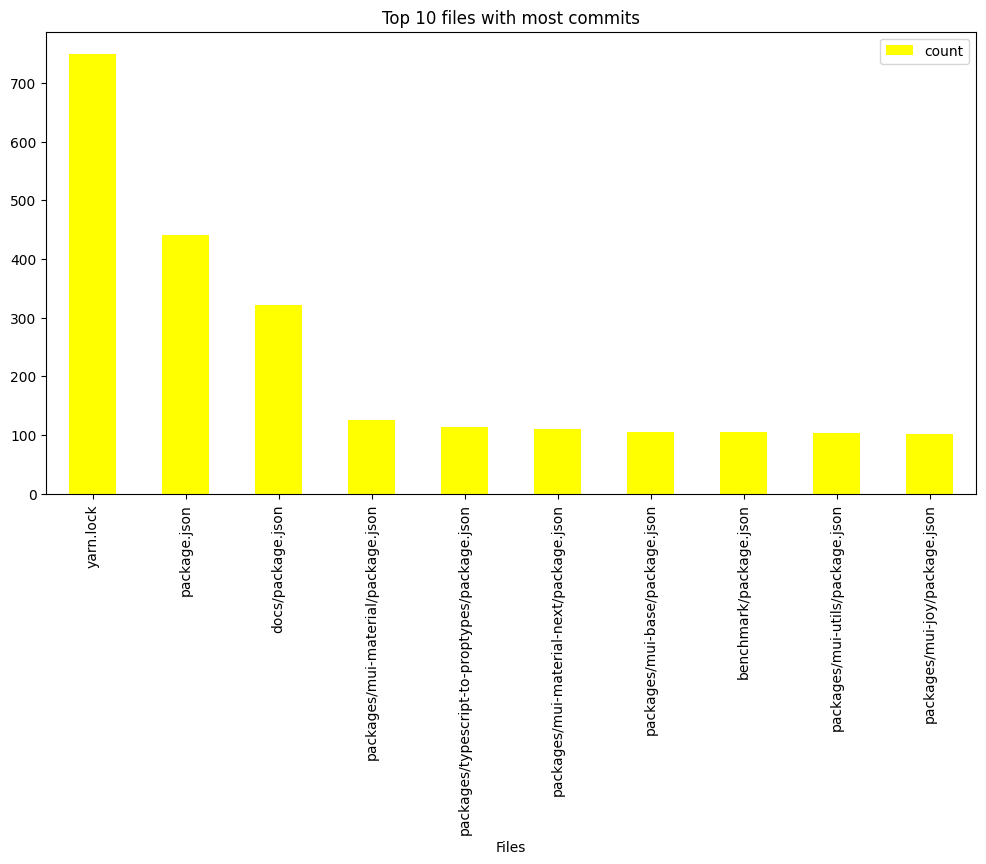

In [37]:
topfivefiles_df = file_df.head(10).to_frame()
topfivefiles_df.plot(title = 'Top 10 files with most commits',color = 'yellow',kind = 'bar', figsize = (12,6))

Overall Success Rate

In [38]:
sucess_rate = df['Passed'].value_counts().to_frame()
sucess_rate['Percentage'] = [i/2495 * 100  for i in sucess_rate['count']]
sucess_rate

,count,Percentage
Passed,,
Success,1368,54.829659
Fail,1127,45.170341


<Axes: ylabel='Percentage'>

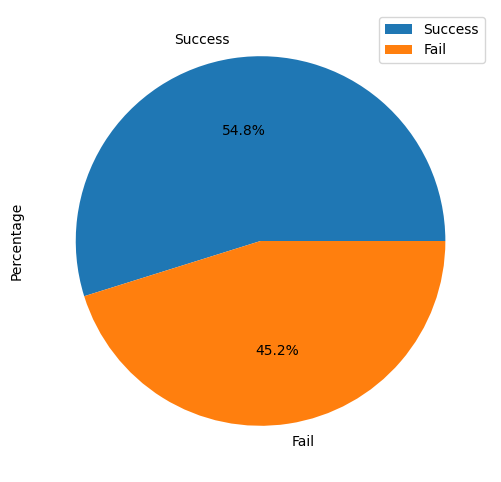

In [39]:
sucess_rate.plot( y='Percentage',autopct = '%1.1f%%',kind = 'pie', figsize = (12,6))

Language Percentage in Repo

<Axes: ylabel='Percentage'>

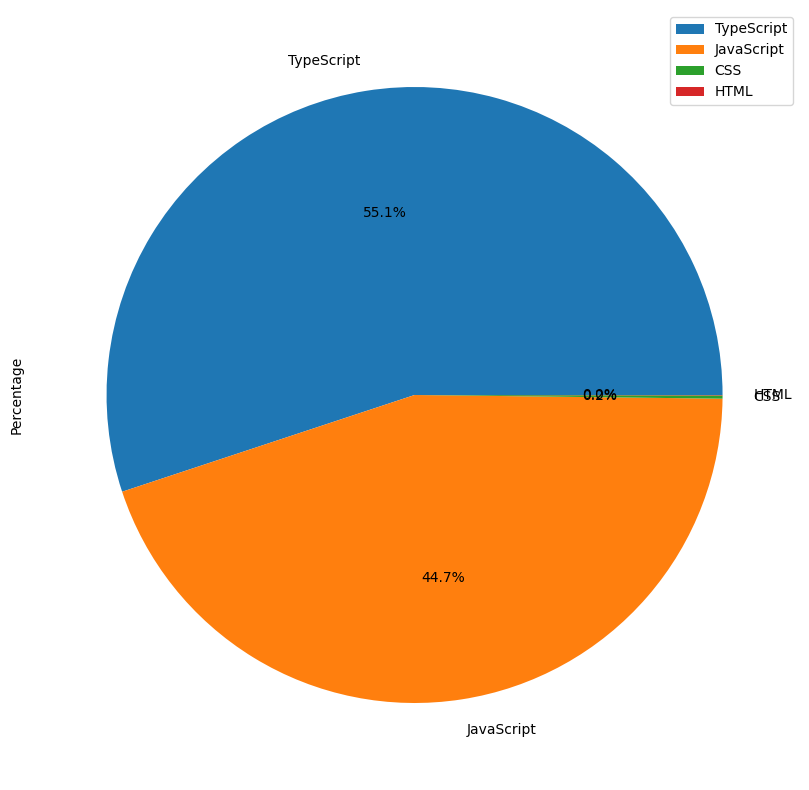

In [40]:
language_df = pd.read_csv('language.csv',index_col=0)
language_df['Percentage'] = [i/language_df['Number of Code lines'].sum() * 100 for i in language_df['Number of Code lines']]
language_df.plot(y = 'Percentage',kind = 'pie', figsize = (20,10), autopct = '%1.1f%%')

Future Works

In [96]:
from sklearn.linear_model import LinearRegression
monthly_counts['Month'] = range(1,13)
X = monthly_counts[['Month']]
y = monthly_counts['Commits']
model = LinearRegression()
model.fit(X,y)
months = pd.DataFrame({'Month': range(13, 25)})
predictions = model.predict(months)
predictions = [round(i) for i in predictions]
prediction_df = pd.DataFrame(index=['2024-'+str(i) for i in range(1,13)])
prediction_df['Commits'] = predictions
prediction_df

,Commits
2024-1,250
2024-2,256
2024-3,263
2024-4,269
2024-5,275
2024-6,282
2024-7,288
2024-8,295
2024-9,301
2024-10,307


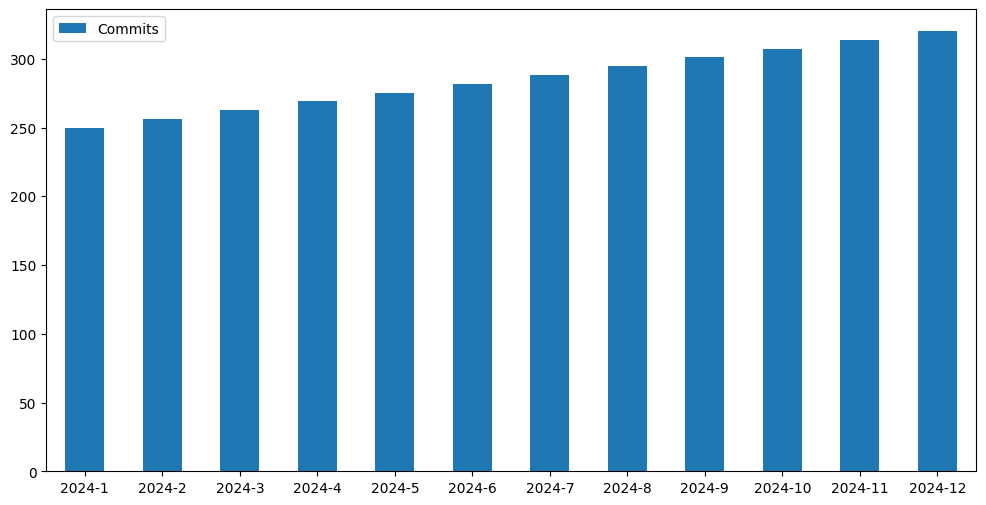

In [98]:
prediction_df.plot(kind = 'bar', figsize = (12,6))
plt.xticks(rotation=0)
plt.show()